In [1]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import operator
plt.style.use('ggplot')
%matplotlib inline

def load_df(path, columns=None, nthreads=4, strings_to_categorical=True):
    try:
        table = pq.read_table(path, columns=columns, nthreads=nthreads)
        return table.to_pandas(strings_to_categorical=strings_to_categorical)
    except Exception as e:
        print(e)
        
def unpack_comb(n):
    return np.unpackbits(np.array([n], dtype=np.uint8))

        
facts_df = load_df(r'C:\Users\ruben\Desktop\Investigation\Scripts_new\src\facts_table.parquet', None)
services_df = load_df(r'C:\Users\ruben\Desktop\Investigation\Scripts_new\src\services_dimension.parquet', None)
devices_df = load_df(r'C:\Users\ruben\Desktop\Investigation\Scripts_new\src\devices_dimension.parquet', None)
time_df = load_df(r'C:\Users\ruben\Desktop\Investigation\Scripts_new\src\time_dimension.parquet', None)

display(facts_df.head())
display(services_df.head())
display(devices_df.head())
display(time_df.head())

,device_id,time_id,services_id,discharge_per_unit,charge_per_unit,reach_full,standard_dev
110376,1,1,64,304.130005,-1.000000,-1,130.240005
110375,1,2,64,-1.000000,76.459999,0,19.709999
110374,1,2,64,414.000000,-1.000000,-1,154.250000
110373,1,2,64,-1.000000,104.620003,1,38.930000
110372,1,3,64,390.600006,-1.000000,-1,296.269989


,services_id,bluetooth_enabled,location_enabled,power_saver_enabled,flashlight_enabled,nfc_enabled,unknown_sources,developer_mode
0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,1
2,4,0,0,0,0,0,1,0
3,6,0,0,0,0,0,1,1
4,8,0,0,0,0,1,0,0


,id,model,manufacturer,brand,product,os_version,kernel_version,is_root
0,1,vs500pp,lge,lge,m1v_pp_vzw,6.0.1,3.10.49-gf18313b-00011-g5e5ed63,0
1,2,ao5510,yu,yu,yureka,5.1.1,3.10.49-cyanogenmod-gbca6118,1
2,3,asus_x014d,asus,asus,ww_phone,5.1.1,3.4.0-gdf95949-dirty,0
3,4,nexus 5,lge,google,hammerhead,6.0.1,3.4.0-gcf10b7e,0
4,5,lg-d331,lge,lge,luv80ss_global_com,4.4.2,3.4.67,0


,time_id,day,month,year
0,1,15,10,2017
1,2,16,10,2017
2,3,17,10,2017
3,4,18,10,2017
4,5,19,10,2017


Total devices = 7425


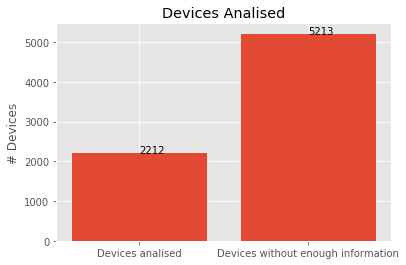

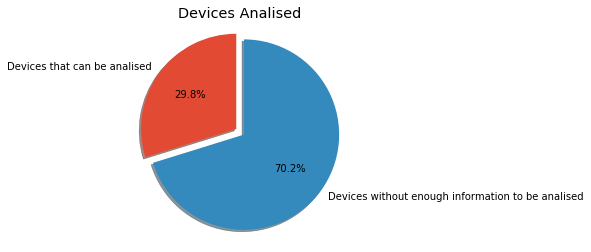

In [2]:
print('Total devices =', len(devices_df))
devices_analise = (len(facts_df['device_id'].unique()) / len(devices_df)) * 100
devices_not_analised = 100 - devices_analise

x = ['Devices analised', 'Devices without enough information']
y = [len(facts_df['device_id'].unique()), len(devices_df) - len(facts_df['device_id'].unique())]

plt.title('Devices Analised')
plt.bar(x, y)
plt.ylabel('# Devices')

for a, b in zip(x, y):
    plt.text(a, b, str(b))
    
#--------------------------------------------------------------
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Devices that can be analised', 'Devices without enough information to be analised'
sizes = [devices_analise, devices_not_analised]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()

plt.title('Devices Analised')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()

<h1><center>Services</center></h1>

# Top 15 common service combinations
Common service combinations between our users

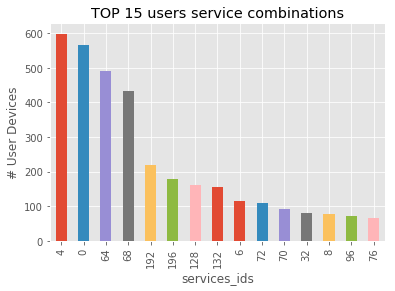

,bluetooth_enabled,location_enabled,power_saver_enabled,flashlight_enabled,nfc_enabled,unknown_sources,developer_mode
services_id,,,,,,,
4,0,0,0,0,0,1,0
0,0,0,0,0,0,0,0
64,0,1,0,0,0,0,0
68,0,1,0,0,0,1,0
192,1,1,0,0,0,0,0
196,1,1,0,0,0,1,0
128,1,0,0,0,0,0,0
132,1,0,0,0,0,1,0
6,0,0,0,0,0,1,1


In [3]:
servies_comb = facts_df.drop_duplicates(['device_id', 'services_id']).groupby('services_id').count().sort_values(by=['device_id'], ascending=False).device_id[0:15]

plot = servies_comb.plot(kind='bar', title='TOP 15 users service combinations')
plot.set(xlabel='services_ids', ylabel='# User Devices')
plt.show()

#------

matrix = []
for comb_id in servies_comb.index:
    matrix.append(list(unpack_comb(comb_id))) 
matrix = np.matrix(matrix)
matrix = np.delete(matrix, 7, 1)

t = pd.DataFrame(matrix, columns=list(services_df.columns)[1:], index=servies_comb.index)
t.loc['sum'] = t.sum()
display(t)

# Most commom services used by our users
Which servies are the most commun between our users

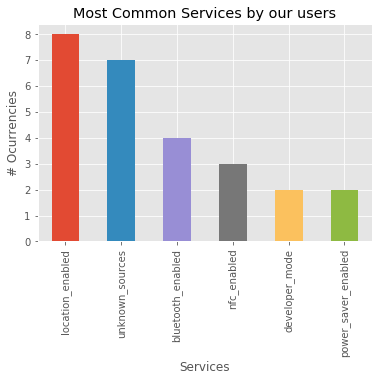

In [4]:
total = t.loc['sum']
total = total[total > 0].sort_values(ascending=False)

plot = total.plot(kind='bar', title='Most Common Services by our users')
plot.set(xlabel='Services', ylabel='# Ocurrencies')
plot

# Service Combinations VS Charge/Discharge Rates
Which servies and combination is associated with highest charge rates

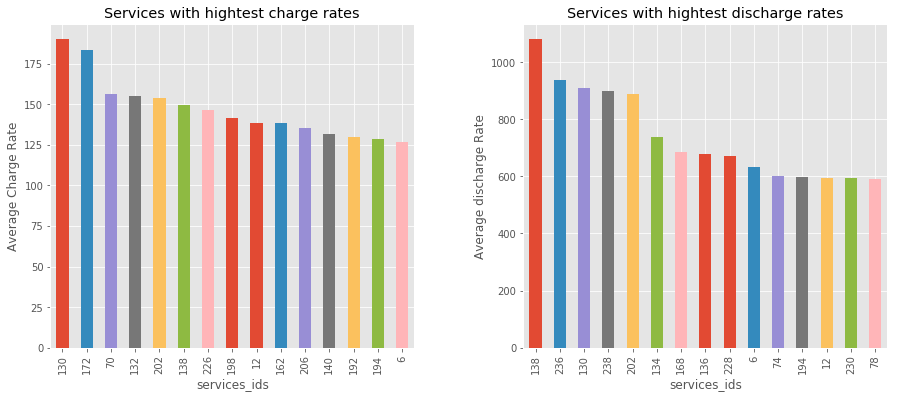

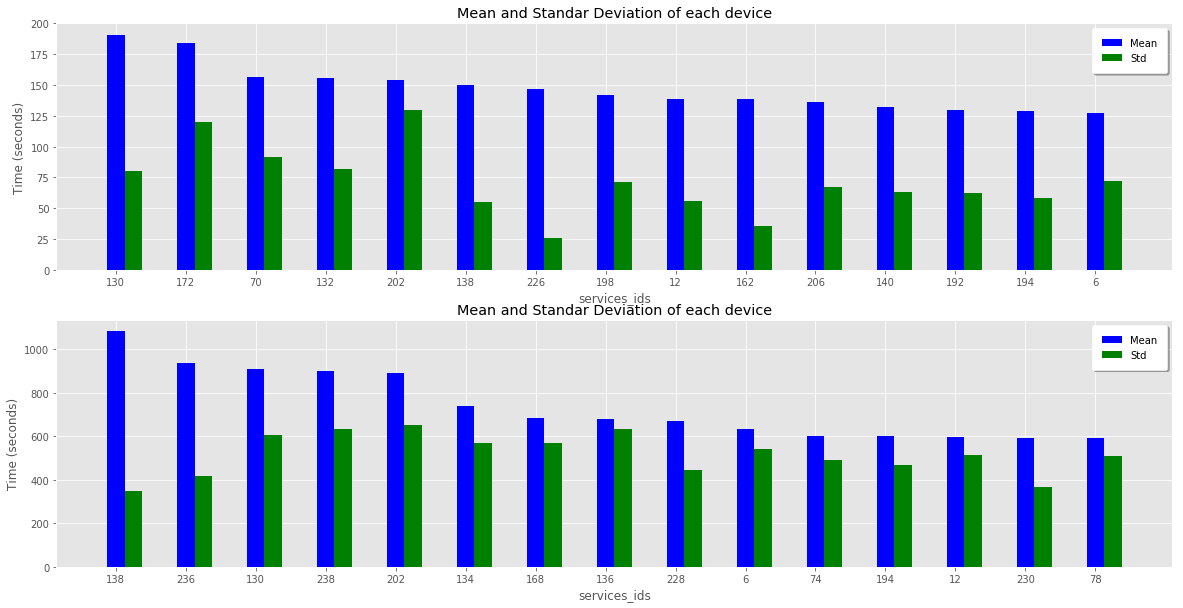

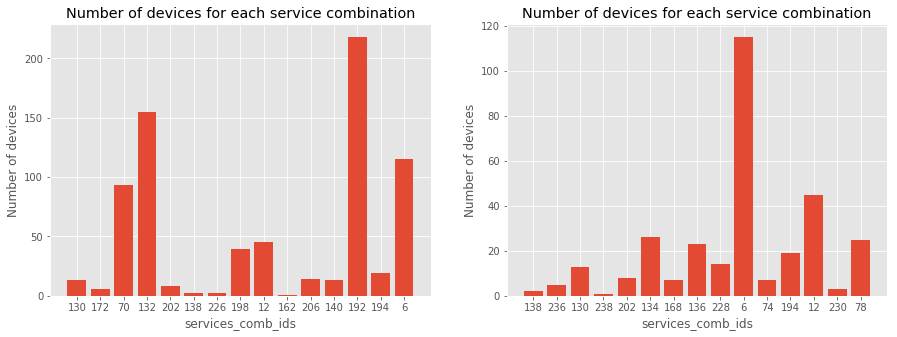

,bluetooth_enabled,location_enabled,power_saver_enabled,flashlight_enabled,nfc_enabled,unknown_sources,developer_mode
services_id,,,,,,,
6,0,0,0,0,0,1,1
12,0,0,0,0,1,1,0
70,0,1,0,0,0,1,1
74,0,1,0,0,1,0,1
78,0,1,0,0,1,1,1
130,1,0,0,0,0,0,1
132,1,0,0,0,0,1,0
134,1,0,0,0,0,1,1
136,1,0,0,0,1,0,0


In [5]:
#pre calculations
charge_samples = facts_df[facts_df.charge_per_unit > 0]
aux = charge_samples.groupby('services_id').mean().sort_values(by='charge_per_unit', ascending=False)
each_service_charge_mean = aux.charge_per_unit[0:15]
each_service_charge_std = aux.standard_dev[0:15]


discharge_samples = facts_df[facts_df.discharge_per_unit > 0]
aux = discharge_samples.groupby('services_id').mean().sort_values(by='discharge_per_unit', ascending=False)
each_service_discharge_mean = aux.discharge_per_unit[0:15]
each_service_discharge_std = aux.standard_dev[0:15]

#------------------------
#first 2 plots in a subplot
plt.subplots(1,2,figsize=(15,15))

plt.subplot(1, 2, 1)
plot = each_service_charge_mean.plot(kind='bar', title='Services with hightest charge rates')
plot.set(xlabel='services_ids', ylabel='Average Charge Rate')


plt.subplot(1, 2, 2)
plot = each_service_discharge_mean.plot(kind='bar', title='Services with hightest discharge rates')
plot.set(xlabel='services_ids', ylabel='Average discharge Rate')

plt.subplots_adjust(left=None, bottom=1, right=None, top=1.3, wspace=0.3, hspace=None)
plt.show()

#------------------------
#2 subplots of mean and std
plt.figure(figsize=(20,10))

plt.subplot(2, 1, 1)
X = np.arange(len(each_service_charge_mean))
plt.bar(X + 0.00, each_service_charge_mean.values, color = 'b', width = 0.25)
plt.bar(X + 0.25, each_service_charge_std.values, color = 'g', width = 0.25)
plt.xticks(X, each_service_charge_mean.index)
plt.title('Mean and Standar Deviation of each device')
plt.xlabel('services_ids')
plt.ylabel('Time (seconds)')

legend = plt.legend(['Mean', 'Std'], fancybox=True, framealpha=1, shadow=True, borderpad=1)
frame = legend.get_frame()
frame.set_color('white')



plt.subplot(2, 1, 2)
X = np.arange(len(each_service_discharge_mean))
plt.bar(X + 0.00, each_service_discharge_mean.values, color = 'b', width = 0.25)
plt.bar(X + 0.25, each_service_discharge_std.values, color = 'g', width = 0.25)
plt.xticks(X, each_service_discharge_mean.index)
plt.title('Mean and Standar Deviation of each device')
plt.xlabel('services_ids')
plt.ylabel('Time (seconds)')

legend = plt.legend(['Mean', 'Std'], fancybox=True, framealpha=1, shadow=True, borderpad=1)
frame = legend.get_frame()
frame.set_color('white')

plt.show()

#--------------------------
# combinations devices
services_devices = facts_df.groupby('services_id').device_id.unique()

charge_services_dict = dict()
for serviceId in each_service_charge_mean.index:
    charge_services_dict[serviceId] = len(services_devices[serviceId])
    
discharge_services_dict = dict()
for serviceId in each_service_discharge_mean.index:
    discharge_services_dict[serviceId] = len(services_devices[serviceId])

plt.subplots(1,2,figsize=(15,5))

plt.subplot(1, 2, 1)
plt.bar(range(len(charge_services_dict)), list(charge_services_dict.values()), align='center')
plt.xticks(range(len(charge_services_dict)), list(charge_services_dict.keys()))
plt.title('Number of devices for each service combination')
plt.xlabel('services_comb_ids')
plt.ylabel('Number of devices')

plt.subplot(1, 2, 2)
plt.bar(range(len(discharge_services_dict)), list(discharge_services_dict.values()), align='center')
plt.xticks(range(len(discharge_services_dict)), list(discharge_services_dict.keys()))
plt.title('Number of devices for each service combination')
plt.xlabel('services_comb_ids')
plt.ylabel('Number of devices')

plt.show()

#--------------------------
#combination table
matrix = []
for comb_id in each_service_charge_mean.index:
    matrix.append(list(unpack_comb(comb_id))) 
matrix = np.matrix(matrix)
matrix = np.delete(matrix, 7, 1)

charge_services = pd.DataFrame(matrix, columns=list(services_df.columns)[1:], index=each_service_charge_mean.index)


matrix = []
for comb_id in each_service_discharge_mean.index:
    matrix.append(list(unpack_comb(comb_id))) 
matrix = np.matrix(matrix)
matrix = np.delete(matrix, 7, 1)

discharge_services = pd.DataFrame(matrix, columns=list(services_df.columns)[1:], index=each_service_discharge_mean.index)


test = charge_services.append(discharge_services)
test = test[~test.index.duplicated()]
test = test.sort_values(by='services_id')

display(test)

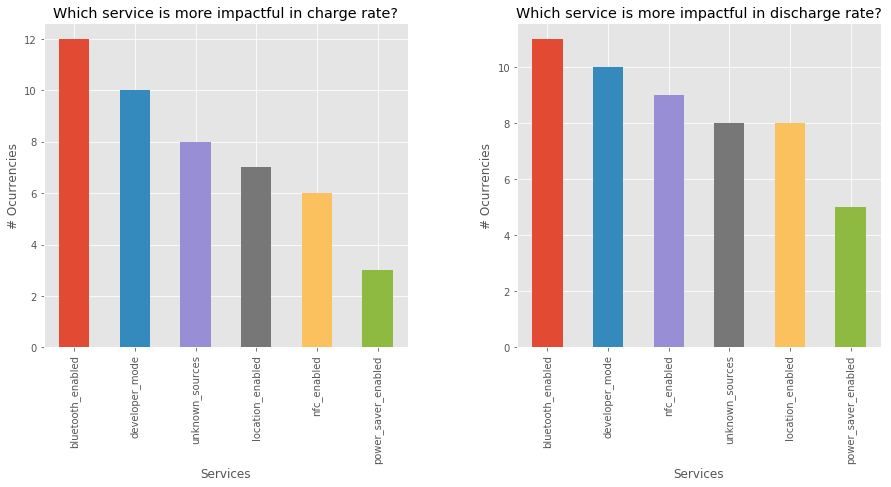

In [6]:
charge_services.loc['sum'] = charge_services.sum()
discharge_services.loc['sum'] = discharge_services.sum()

total_charge = charge_services.loc['sum']
total_charge = total_charge[total_charge > 0].sort_values(ascending=False)

total_discharge = discharge_services.loc['sum']
total_discharge = total_discharge[total_discharge > 0].sort_values(ascending=False)



plt.subplots(1,2,figsize=(15,15))


plt.subplot(1, 2, 1)
plot = total_charge.plot(kind='bar', title='Which service is more impactful in charge rate?')
plot.set(xlabel='Services', ylabel='# Ocurrencies')

plt.subplot(1, 2, 2)
plot = total_discharge.plot(kind='bar', title='Which service is more impactful in discharge rate?')
plot.set(xlabel='Services', ylabel='# Ocurrencies')

plt.subplots_adjust(left=None, bottom=1, right=None, top=1.3, wspace=0.3, hspace=None)
plt.show()

<h1><center>Devices</center></h1>

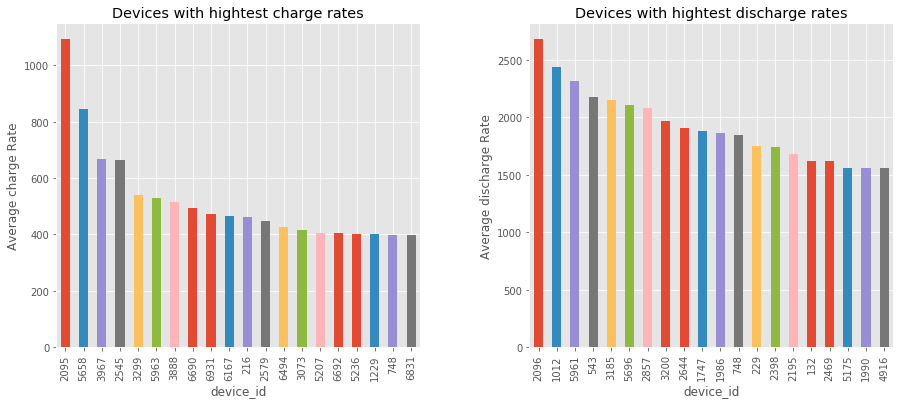

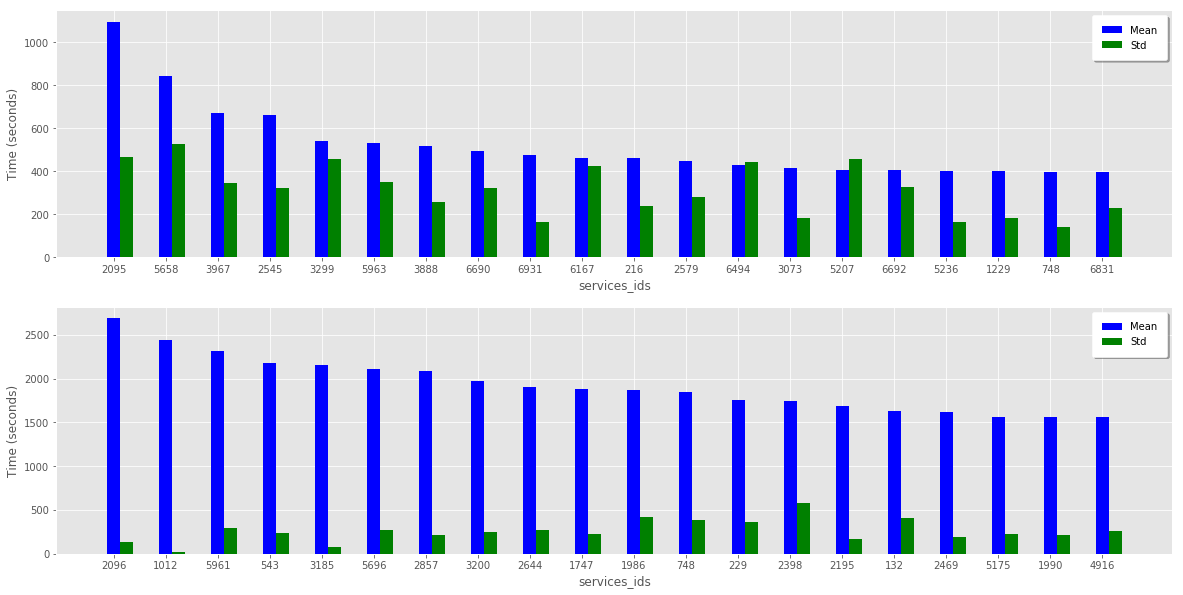

In [7]:
aux = charge_samples.groupby('device_id').mean().sort_values(by='charge_per_unit', ascending=False)
device_top_charge_means = aux.charge_per_unit[0:20]
device_top_charge_std = aux.standard_dev[0:20]

aux = discharge_samples.groupby('device_id').mean().sort_values(by='charge_per_unit', ascending=False)
device_top_discharge_means = discharge_samples.groupby('device_id').discharge_per_unit.mean().sort_values(ascending=False)[0:20]
device_top_discharge_std = aux.standard_dev[0:20]

plt.subplots(1,2,figsize=(15,15))

plt.subplot(1, 2, 1)
plot = device_top_charge_means.plot(kind='bar', title='Devices with hightest charge rates')
plot.set(xlabel='device_id', ylabel='Average charge Rate')

plt.subplot(1, 2, 2)
plot = device_top_discharge_means.plot(kind='bar', title='Devices with hightest discharge rates')
plot.set(xlabel='device_id', ylabel='Average discharge Rate')

plt.subplots_adjust(left=None, bottom=1, right=None, top=1.3, wspace=0.3, hspace=None)
plt.show()

#------------------------
plt.figure(figsize=(20,10))

plt.subplot(2, 1, 1)
X = np.arange(len(device_top_charge_means))
plt.bar(X + 0.00, device_top_charge_means.values, color = 'b', width = 0.25)
plt.bar(X + 0.25, device_top_charge_std.values, color = 'g', width = 0.25)
plt.xticks(X, device_top_charge_means.index)
plt.xlabel('services_ids')
plt.ylabel('Time (seconds)')

legend = plt.legend(['Mean', 'Std'], fancybox=True, framealpha=1, shadow=True, borderpad=1)
frame = legend.get_frame()
frame.set_color('white')



plt.subplot(2, 1, 2)
X = np.arange(len(device_top_discharge_means))
plt.bar(X + 0.00, device_top_discharge_means.values, color = 'b', width = 0.25)
plt.bar(X + 0.25, device_top_discharge_std.values, color = 'g', width = 0.25)
plt.xticks(X, device_top_discharge_means.index)
plt.xlabel('services_ids')
plt.ylabel('Time (seconds)')

legend = plt.legend(['Mean', 'Std'], fancybox=True, framealpha=1, shadow=True, borderpad=1)
frame = legend.get_frame()
frame.set_color('white')

plt.show()

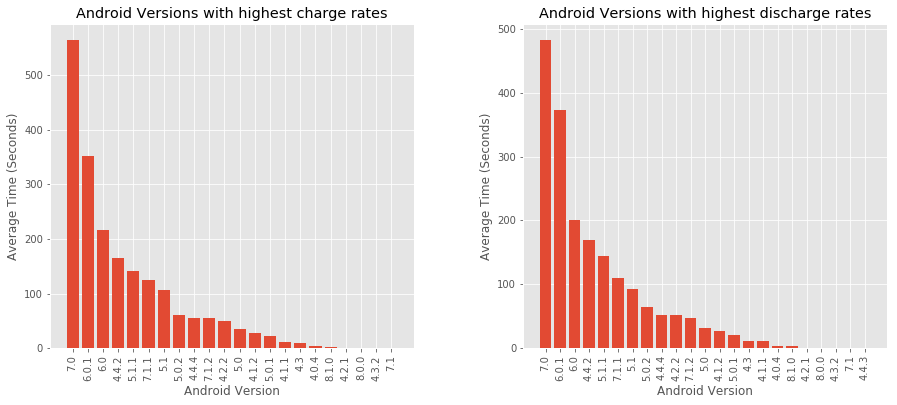

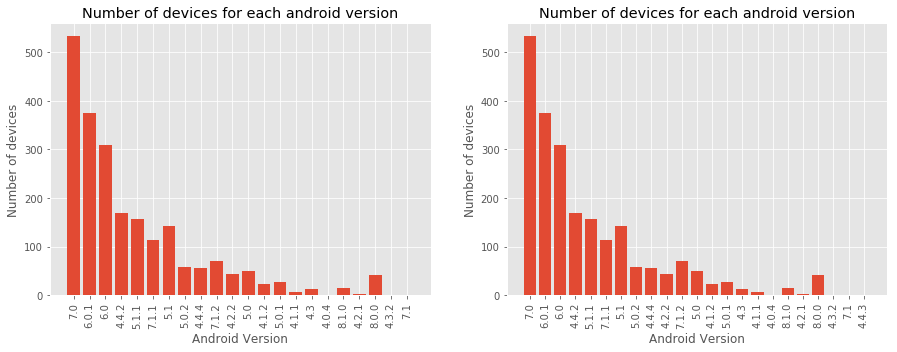

In [8]:
device_top_charge_means = charge_samples.groupby('device_id').charge_per_unit.mean().sort_values(ascending=False)
device_top_discharge_means = discharge_samples.groupby('device_id').discharge_per_unit.mean().sort_values(ascending=False)

android_versions_charge = []
android_versions_discharge = []

for devID in device_top_charge_means.index:
    dev_if_row = devices_df[devices_df.id == devID]
    android_versions_charge.append(dev_if_row.iloc[0].os_version)
    
for devID in device_top_discharge_means.index:
    dev_if_row = devices_df[devices_df.id == devID]
    android_versions_discharge.append(dev_if_row.iloc[0].os_version)
    
freq_charge = {i: android_versions_charge.count(i) for i in set(android_versions_charge)}
freq_charge = sorted(freq_charge.items(), key=operator.itemgetter(1), reverse=True)
freq_discharge = {i: android_versions_discharge.count(i) for i in set(android_versions_discharge)}
freq_discharge = sorted(freq_discharge.items(), key=operator.itemgetter(1), reverse=True)

#-----------------
plt.subplots(1,2,figsize=(15,15))

plt.subplot(1, 2, 1)
plt.bar(range(len(freq_charge)), [val[1] for val in freq_charge], align='center')
plt.title('Android Versions with highest charge rates')
plt.ylabel('Average Time (Seconds)')
plt.xlabel('Android Version')
plt.xticks(range(len(freq_charge)), [val[0] for val in freq_charge])
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(range(len(freq_discharge)), [val[1] for val in freq_discharge], align='center')
plt.title('Android Versions with highest discharge rates')
plt.ylabel('Average Time (Seconds)')
plt.xlabel('Android Version')
plt.xticks(range(len(freq_discharge)), [val[0] for val in freq_discharge])

plt.subplots_adjust(left=None, bottom=1, right=None, top=1.3, wspace=0.3, hspace=None)
plt.xticks(rotation=90)
plt.show()

#-------------------------
dev_with_samples = devices_df.loc[facts_df['device_id'].unique()]

top_highests_charge_android_versions = [val[0] for val in freq_charge]
top_highests_discharge_android_versions = [val[0] for val in freq_discharge]

freq_charge_devices_dict = dict()
for os in top_highests_charge_android_versions:
    freq_charge_devices_dict[os] = len(dev_with_samples[dev_with_samples.os_version == os])
    
freq_discharge_devices_dict = dict()
for os in top_highests_discharge_android_versions:
    freq_discharge_devices_dict[os] = len(dev_with_samples[dev_with_samples.os_version == os])

    
plt.subplots(1,2,figsize=(15,5))

plt.subplot(1, 2, 1)
plt.bar(range(len(freq_charge_devices_dict)), list(freq_charge_devices_dict.values()), align='center')
plt.xticks(range(len(freq_charge_devices_dict)), list(freq_charge_devices_dict.keys()))
plt.xticks(rotation=90)
plt.title('Number of devices for each android version')
plt.xlabel('Android Version')
plt.ylabel('Number of devices')

plt.subplot(1, 2, 2)
plt.bar(range(len(freq_discharge_devices_dict)), list(freq_discharge_devices_dict.values()), align='center')
plt.xticks(range(len(freq_discharge_devices_dict)), list(freq_discharge_devices_dict.keys()))
plt.xticks(rotation=90)
plt.title('Number of devices for each android version')
plt.xlabel('Android Version')
plt.ylabel('Number of devices')

plt.show()